In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("Fish.csv",header=0)
y= data.iloc[:,1].values
y = y.reshape(y.shape[0],1)
df = data.drop("Weight",axis=1)
X = df.iloc[:,:]
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [78]:
X_1 = pd.get_dummies(X,drop_first=True)
X_num = X_1.iloc[:,:5].values
X_dum = X_1.iloc[:,5:].values
print(X_num)

[[23.2    25.4    30.     11.52    4.02  ]
 [24.     26.3    31.2    12.48    4.3056]
 [23.9    26.5    31.1    12.3778  4.6961]
 [26.3    29.     33.5    12.73    4.4555]
 [26.5    29.     34.     12.444   5.134 ]
 [26.8    29.7    34.7    13.6024  4.9274]
 [26.8    29.7    34.5    14.1795  5.2785]
 [27.6    30.     35.     12.67    4.69  ]
 [27.6    30.     35.1    14.0049  4.8438]
 [28.5    30.7    36.2    14.2266  4.9594]
 [28.4    31.     36.2    14.2628  5.1042]
 [28.7    31.     36.2    14.3714  4.8146]
 [29.1    31.5    36.4    13.7592  4.368 ]
 [29.5    32.     37.3    13.9129  5.0728]
 [29.4    32.     37.2    14.9544  5.1708]
 [29.4    32.     37.2    15.438   5.58  ]
 [30.4    33.     38.3    14.8604  5.2854]
 [30.4    33.     38.5    14.938   5.1975]
 [30.9    33.5    38.6    15.633   5.1338]
 [31.     33.5    38.7    14.4738  5.7276]
 [31.3    34.     39.5    15.1285  5.5695]
 [31.4    34.     39.2    15.9936  5.3704]
 [31.5    34.5    39.7    15.5227  5.2801]
 [31.8    3

In [79]:
def feature_normalize(x):
    mu = np.zeros((1,x.shape[1]))
    sigma = np.zeros((1,x.shape[1]))
    for j in range(x.shape[1]):
        mu[:,j] = np.mean(x[:,j],axis=0)
        sigma[:,j] = np.std(x[:,j],axis=0)
        x[:,j] = (x[:,j]-mu[:,j])/sigma[:,j]
    return x

In [80]:
def predict(X,theta):
    pred_y = np.dot(X,theta)
    return pred_y

In [81]:
def computecost(x,y,theta):
    hq = predict(x,theta)
    m = x.shape[1]
    J = np.sum(pow((hq-y),2),axis=0)/(m)
    return J

In [82]:
def gradient_descent(X, y, theta, alpha, num_iter):
    m = X.shape[0]
    J_history = np.zeros((num_iter,1))
    
    for i in range(0,num_iter):
        prd_y = predict(X,theta)
        dJ = np.sum(((prd_y-y)*X),axis=0)*2/m
        dJ = dJ.reshape(dJ.shape[0],1)
        theta = theta - alpha*dJ
        J_history[i] = computecost(X,y,theta)
        
    return theta,J_history

In [83]:
X_num_norm = feature_normalize(X_num)
X_0 = np.ones((X_num_norm.shape[0],1))
X_mask = np.concatenate((X_num_norm,X_dum),axis=1)
X_norm = np.concatenate((X_0,X_mask),axis=1)
pd.DataFrame(X_norm)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-0.235542,-0.179332,-0.010977,0.797341,0.165793,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.005302,0.054694,0.196390,0.879771,0.022621,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.025372,0.054694,0.239592,0.812835,0.426371,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.0,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403,0.0,0.0,0.0,0.0,1.0,0.0
155,1.0,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547,0.0,0.0,0.0,0.0,1.0,0.0
156,1.0,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402,0.0,0.0,0.0,0.0,1.0,0.0
157,1.0,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
theta_0 = np.zeros((X_norm.shape[1],1))
num_iters = 1500
theta, J_hist = gradient_descent(X_norm,y,theta_0,0.01,num_iters)
theta

array([[362.72227636],
       [ 98.06953552],
       [ 96.70340657],
       [ 86.68529566],
       [ 60.00603587],
       [ 67.62591375],
       [ 36.2475486 ],
       [ 43.89318661],
       [-72.03064097],
       [  5.9386006 ],
       [266.31605231],
       [ 33.05150145]])

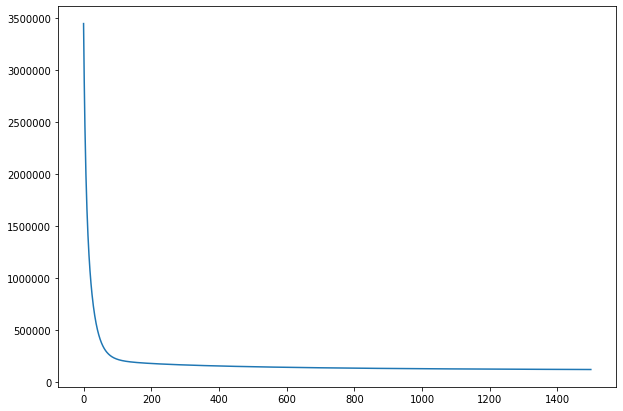

In [85]:
fig = plt.figure(figsize=(10,7))
plt.plot(range(num_iters),J_hist)
plt.show()

In [86]:
a = J_hist[-1]
a**0.5

array([353.18782794])

In [87]:
X_trans = X_norm.transpose()
X_1 = np.dot(X_trans,X_norm)
X_inv = np.linalg.inv(X_1)
t_1 = np.dot(X_inv,X_trans)
t = np.dot(t_1,y)
cost = computecost(X_norm,y,t)
cost**0.5

array([328.3948753])

In [88]:
y_pred = predict(X_norm,theta)

In [89]:
y_pred

array([[ 316.0465098 ],
       [ 366.02999374],
       [ 380.38642828],
       [ 439.87683207],
       [ 468.87744153],
       [ 491.36416317],
       [ 512.09985413],
       [ 481.55198023],
       [ 507.23751321],
       [ 538.4358729 ],
       [ 546.50285094],
       [ 539.32647416],
       [ 522.71755524],
       [ 568.44213703],
       [ 585.27954842],
       [ 608.53813741],
       [ 615.70384313],
       [ 614.75438924],
       [ 632.14752387],
       [ 641.49632533],
       [ 657.79928857],
       [ 660.67384466],
       [ 659.68198554],
       [ 707.36728669],
       [ 696.64813646],
       [ 719.01838874],
       [ 720.24589045],
       [ 735.5102141 ],
       [ 756.43598975],
       [ 825.18371968],
       [ 839.89772611],
       [ 839.2347573 ],
       [ 897.66468221],
       [ 925.78198507],
       [ 906.80654992],
       [-159.08174165],
       [ -17.38118429],
       [  11.85499887],
       [  46.73542421],
       [  76.98105696],
       [  84.62018884],
       [  88.023

In [3]:
df1 = pd.read_csv('Fish.csv',header=0)
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


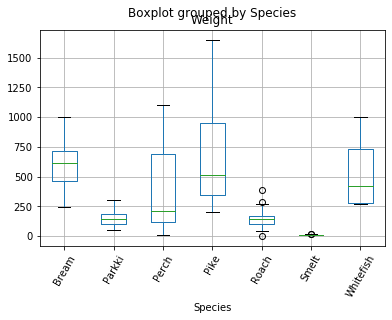

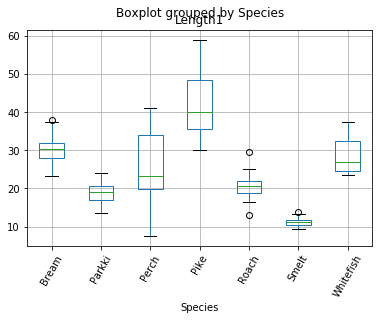

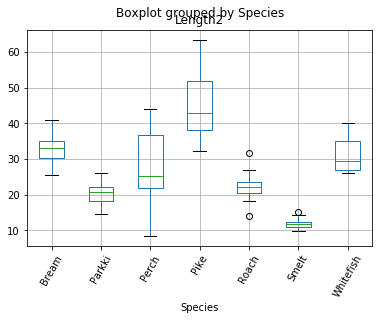

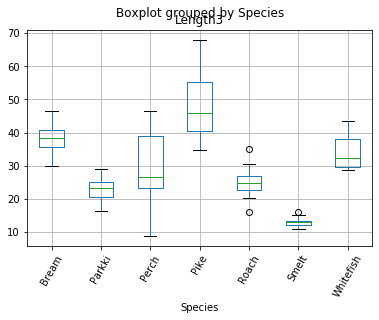

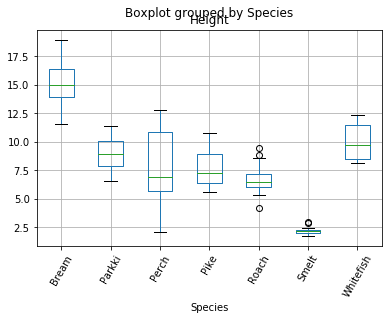

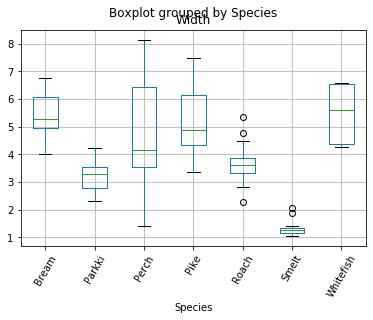

In [4]:
df1.boxplot('Weight','Species',rot=60)
df1.boxplot('Length1','Species',rot=60)
df1.boxplot('Length2','Species',rot=60)
df1.boxplot('Length3','Species',rot=60)
df1.boxplot('Height','Species',rot=60)
df1.boxplot('Width','Species',rot=60)
plt.show()

In [8]:
list(df1['Species'].unique())

['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']

In [9]:
df1.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
df1.groupby('Species').count()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,35,35,35,35,35,35
Parkki,11,11,11,11,11,11
Perch,56,56,56,56,56,56
Pike,17,17,17,17,17,17
Roach,20,20,20,20,20,20
Smelt,14,14,14,14,14,14
Whitefish,6,6,6,6,6,6


In [20]:
Weight_Bream = df1[df1['Species'] == 'Bream']['Weight']

In [21]:
Weight_Bream

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
5      450.0
6      500.0
7      390.0
8      450.0
9      500.0
10     475.0
11     500.0
12     500.0
13     340.0
14     600.0
15     600.0
16     700.0
17     700.0
18     610.0
19     650.0
20     575.0
21     685.0
22     620.0
23     680.0
24     700.0
25     725.0
26     720.0
27     714.0
28     850.0
29    1000.0
30     920.0
31     955.0
32     925.0
33     975.0
34     950.0
Name: Weight, dtype: float64

Text(0.5, 20.80000000000002, 'Length1')

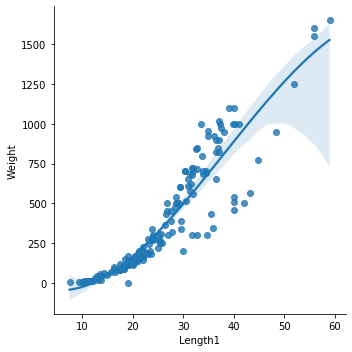

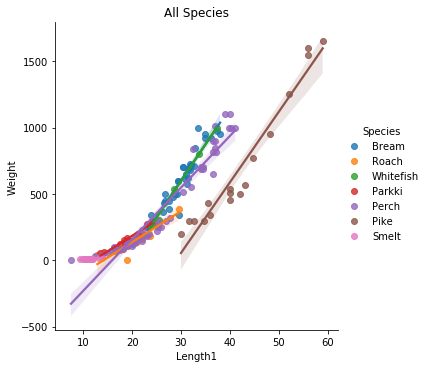

In [7]:
sns.lmplot(x="Length1", y="Weight", data=df1, order=3, legend=True)

sns.lmplot(x="Length1", y="Weight", data=df1, hue='Species', order=1, legend=True)

plt.title('All Species')
plt.ylabel('Weight')
plt.xlabel('Length1')

Text(0.5, 20.80000000000002, 'Length1')

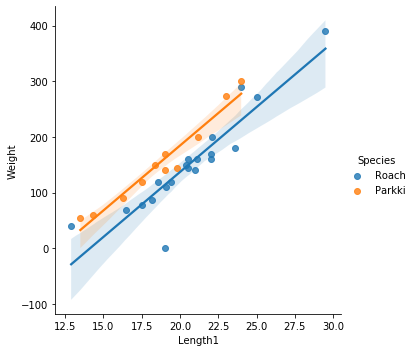

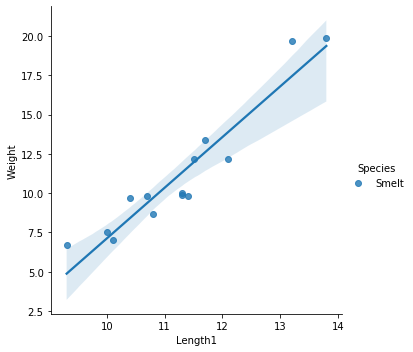

In [32]:
sns.lmplot(x="Length1", y="Weight", data=df1[df1['Species'].isin(['Roach', 'Parkki'])], order=1, hue='Species', legend=True)

sns.lmplot(x="Length1", y="Weight", data=df1[df1['Species']=='Smelt'], order=1, hue='Species', legend=True)

plt.ylabel('Weight')
plt.xlabel('Length1')

In [5]:
df[df["Species"].isin(['Roach', 'Parkki'])]
    

,Species,Length1,Length2,Length3,Height,Width
35,Roach,12.9,14.1,16.2,4.1472,2.2680
36,Roach,16.5,18.2,20.3,5.2983,2.8217
37,Roach,17.5,18.8,21.2,5.5756,2.9044
38,Roach,18.2,19.8,22.2,5.6166,3.1746
39,Roach,18.6,20.0,22.2,6.2160,3.5742
40,Roach,19.0,20.5,22.8,6.4752,3.3516
41,Roach,19.1,20.8,23.1,6.1677,3.3957
42,Roach,19.4,21.0,23.7,6.1146,3.2943
43,Roach,20.4,22.0,24.7,5.8045,3.7544
44,Roach,20.5,22.0,24.3,6.6339,3.5478


In [11]:
pd.DataFrame(data.groupby("Species")["Weight"].mean())

,Weight
Species,
Bream,617.828571
Parkki,154.818182
Perch,382.239286
Pike,718.705882
Roach,152.050000
Smelt,11.178571
Whitefish,531.000000


In [15]:
data["Species"].value_counts(normalize=True)

Perch        0.352201
Bream        0.220126
Roach        0.125786
Pike         0.106918
Smelt        0.088050
Parkki       0.069182
Whitefish    0.037736
Name: Species, dtype: float64

In [18]:
data.set_index("Species").sort_index(ascending=False)

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Whitefish,306.0,25.6,28.0,30.8,8.7780,4.6816
Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
Whitefish,270.0,24.1,26.5,29.3,8.1454,4.2485
Whitefish,540.0,28.5,31.0,34.0,10.7440,6.5620
Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
...,...,...,...,...,...,...
Bream,700.0,31.9,35.0,40.5,16.2405,5.5890
Bream,680.0,31.8,35.0,40.6,15.4686,6.1306
Bream,620.0,31.5,34.5,39.7,15.5227,5.2801


In [22]:
data.drop_duplicates(subset="Species")

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
35,Roach,40.0,12.9,14.1,16.2,4.1472,2.2680
55,Whitefish,270.0,23.6,26.0,28.7,8.3804,4.2476
61,Parkki,55.0,13.5,14.7,16.5,6.8475,2.3265
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
128,Pike,200.0,30.0,32.3,34.8,5.5680,3.3756
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476


In [37]:
data.set_index("Species").cumsum().reset_index()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,532.0,47.2,51.7,61.2,24.0000,8.3256
2,Bream,872.0,71.1,78.2,92.3,36.3778,13.0217
3,Bream,1235.0,97.4,107.2,125.8,49.1078,17.4772
4,Bream,1665.0,123.9,136.2,159.8,61.5518,22.6112
...,...,...,...,...,...,...,...
154,Smelt,63268.7,4122.5,4463.4,4906.4,1415.8760,695.9090
155,Smelt,63282.1,4134.2,4475.8,4919.9,1418.3060,697.1780
156,Smelt,63294.3,4146.3,4488.8,4933.7,1420.5830,698.4338
157,Smelt,63314.0,4159.5,4503.1,4948.9,1423.4558,700.5010


In [43]:
df2 = data.set_index("Species").cummax()
df2[df2.index == "Bream"].cumsum()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,532.0,47.2,51.7,61.2,24.0000,8.3256
Bream,872.0,71.2,78.2,92.4,36.4800,13.0217
Bream,1235.0,97.5,107.2,125.9,49.2100,17.7178
Bream,1665.0,124.0,136.2,159.9,61.9400,22.8518
Bream,2115.0,150.8,165.9,194.6,75.5424,27.9858
Bream,2615.0,177.6,195.6,229.3,89.7219,33.2643
Bream,3115.0,205.2,225.6,264.3,103.9014,38.5428
Bream,3615.0,232.8,255.6,299.4,118.0809,43.8213
